In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 
import kagglehub

path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

C:\Users\Mik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Mik\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


In [3]:
customers = pd.read_csv(os.path.join(path, 'olist_customers_dataset.csv'))
geolocation = pd.read_csv(os.path.join(path, 'olist_geolocation_dataset.csv'))
order_items = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'))
order_payments = pd.read_csv(os.path.join(path, 'olist_order_payments_dataset.csv'))
order_reviews = pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'))
orders = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))
products = pd.read_csv(os.path.join(path, 'olist_products_dataset.csv'))
sellers = pd.read_csv(os.path.join(path, 'olist_sellers_dataset.csv'))
product_category_name_translation = pd.read_csv(os.path.join(path, 'product_category_name_translation.csv'))

In [4]:
# ------------------------- EDA ------------------------- #

In [5]:
# ----- MERGING ----- #

main_df = order_items.merge(order_payments, on='order_id') \
                     .merge(order_reviews, on='order_id')\
                     .merge(products, on='product_id')\
                     .merge(product_category_name_translation, on='product_category_name')\
                     .merge(sellers, on='seller_id')\
                     .merge(orders, on='order_id')\
                     .merge(customers, on='customer_id')

In [6]:
# TO_DATETIME 
main_df['order_purchase_timestamp'] = pd.to_datetime(main_df['order_purchase_timestamp'])
main_df['order_delivered_customer_date'] = pd.to_datetime(main_df['order_delivered_customer_date'])
main_df['delivery_days'] = (main_df['order_delivered_customer_date'] - main_df['order_purchase_timestamp']).dt.days

In [7]:
main_df 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_days
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,7.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,boleto,1,...,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,17.0
115605,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,boleto,1,...,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,9.0
115606,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,credit_card,3,...,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,4.0
115607,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,credit_card,3,...,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,1.0


In [8]:
# DELIVERY SPEED MAPPING 
def get_shipping_speed(days):
    if days == 0: 
        return 'Same-Day Delivery'
    elif days in range (1, 7): 
        return 'Express'
    elif days in range (7, 16): 
        return 'Standard'
    elif days in range (16, 30): 
        return 'Slow'
    else:  # > 30 days
        return 'Very Slow' 
    
main_df['delivery_speed'] = main_df['delivery_days'].map(get_shipping_speed) 

C:\Users\Mik\AppData\Local\Temp\ipykernel_88616\740640863.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_speed', y='review_score', data=plot_delivery, palette='viridis')


<Figure size 640x480 with 0 Axes>

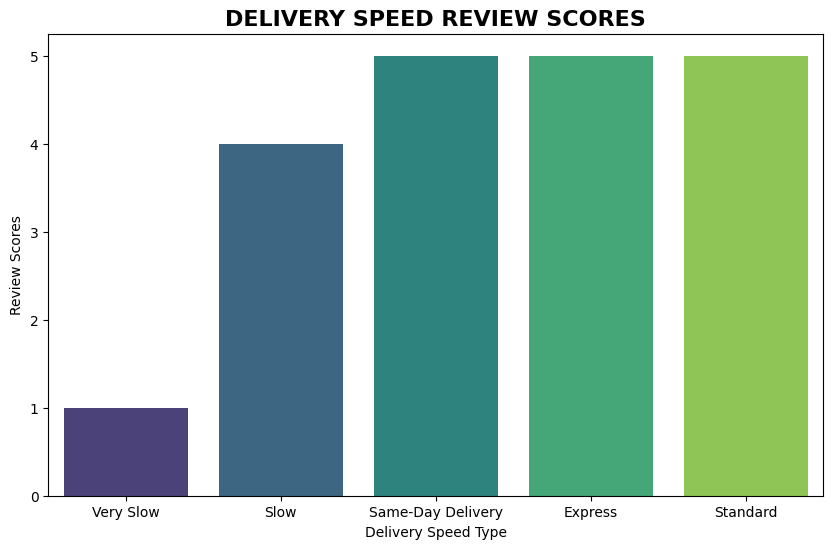

In [9]:
# REVIEW SCORES BETWEEN DELIVERY SPEED 
rs_delivery = main_df.groupby(['customer_unique_id', 'delivery_speed'])['review_score'].median().reset_index() 
plot_delivery = rs_delivery.groupby('delivery_speed')['review_score'].median().sort_values(ascending=True).reset_index() 

plt.tight_layout()
plt.figure(figsize=(10,6))
sns.barplot(x='delivery_speed', y='review_score', data=plot_delivery, palette='viridis')
plt.title('DELIVERY SPEED REVIEW SCORES', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Speed Type')
plt.ylabel('Review Scores')
plt.show()

In [10]:
# REPEAT PURCHASER FILTER 
subsequent_purchase_count = main_df.groupby('customer_unique_id')['order_id'].transform('nunique')
main_df['subsequent_purchaser'] = np.where(subsequent_purchase_count >= 2, 'Yes', 'No') 

<Figure size 640x480 with 0 Axes>

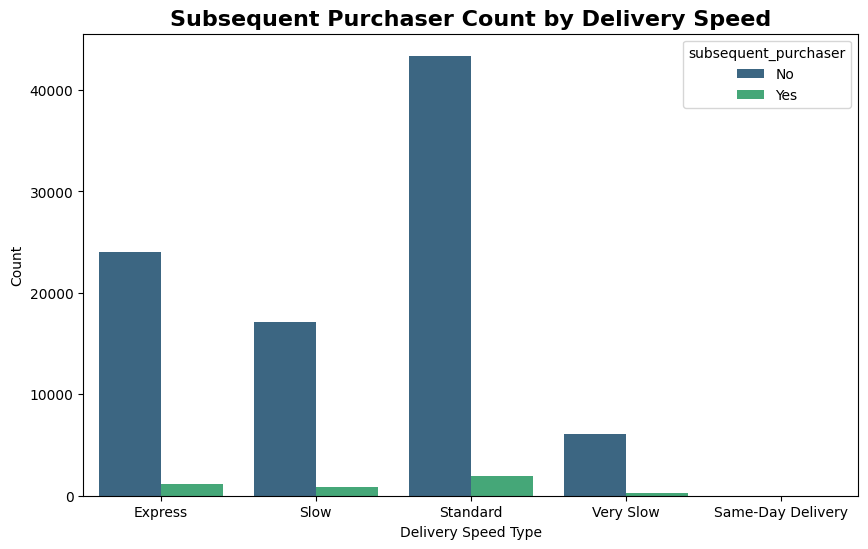

In [12]:
# CUSTOMER LIFETIME VALUE (SUBSEQUENT PURCHASES)
clv_delivery = main_df.groupby(['customer_unique_id', 'delivery_speed'])['subsequent_purchaser'].max().reset_index() 

plt.tight_layout()
plt.figure(figsize=(10,6))
sns.countplot(x='delivery_speed', hue='subsequent_purchaser', data=clv_delivery, palette='viridis')
plt.title('Subsequent Purchaser Count by Delivery Speed', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Speed Type')
plt.ylabel('Count')
plt.show()

<Figure size 640x480 with 0 Axes>

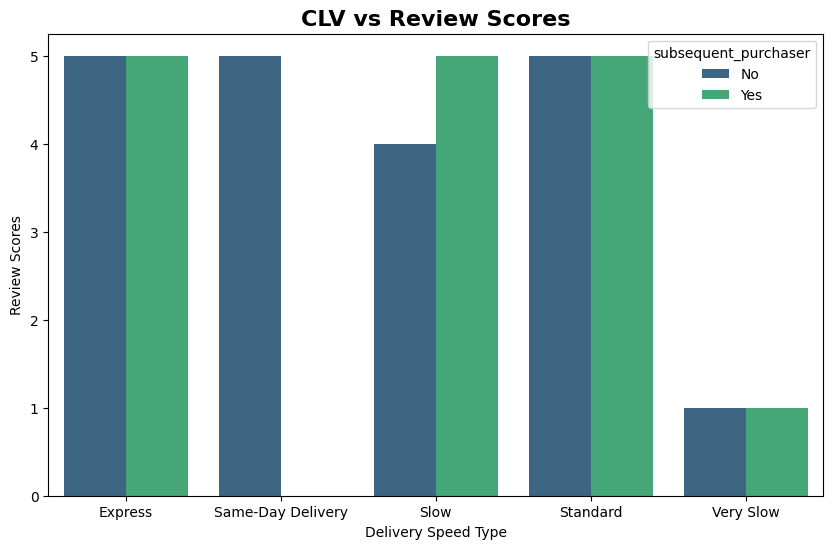

In [14]:
# CUSTOMER LIFETIME VALUE (SUBSEQUENT PURCHASES) VS REVIEW SCORES 
clv_delivery = main_df.groupby(['customer_unique_id', 'delivery_speed'])[['subsequent_purchaser', 'review_score']].agg({'subsequent_purchaser': 'max', 'review_score': 'median'}).reset_index()
clvrs_plot = clv_delivery.groupby(['delivery_speed', 'subsequent_purchaser'])['review_score'].median().reset_index() 

plt.tight_layout()
plt.figure(figsize=(10,6))
sns.barplot(x='delivery_speed', y='review_score', hue='subsequent_purchaser', data=clvrs_plot, palette='viridis')
plt.title('CLV vs Review Scores', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Speed Type')
plt.ylabel('Review Scores')
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_88616\663638026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_speed', y='payment_value', data=total_revenue_by_speed, palette='viridis')


<Figure size 640x480 with 0 Axes>

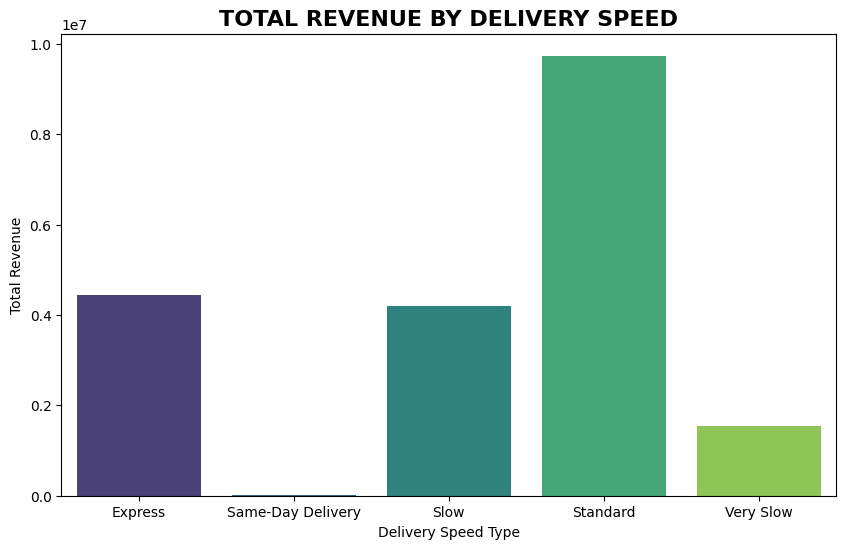

In [15]:
# TOTAL REVENUE 
order_revenue = main_df.groupby(['order_id', 'delivery_speed'])['payment_value'].sum().reset_index()
total_revenue_by_speed = order_revenue.groupby('delivery_speed')['payment_value'].sum().reset_index()

plt.tight_layout()
plt.figure(figsize=(10,6))
sns.barplot(x='delivery_speed', y='payment_value', data=total_revenue_by_speed, palette='viridis')
plt.title('TOTAL REVENUE BY DELIVERY SPEED', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Speed Type')
plt.ylabel('Total Revenue')
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_88616\1608102640.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_speed', y='payment_value', data=plot_delivery1, palette='viridis')


<Figure size 640x480 with 0 Axes>

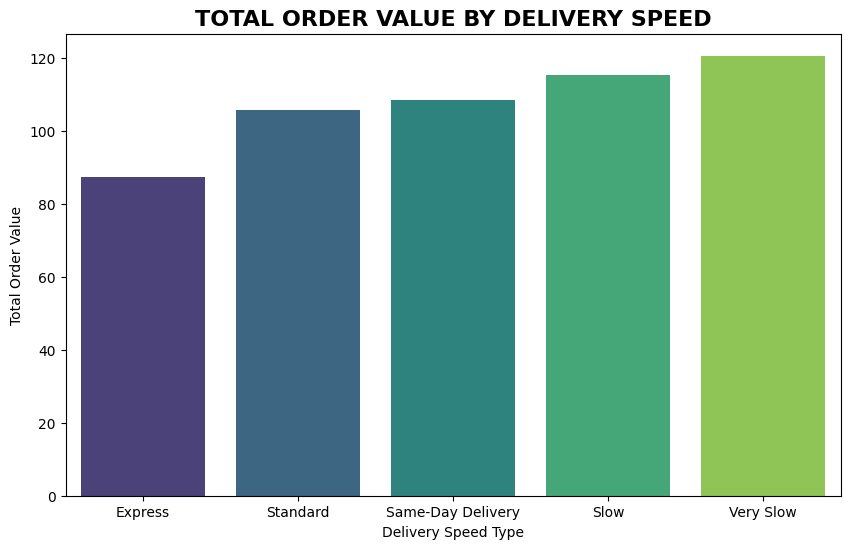

In [16]:
# TOTAL ORDER VALUE BY DELIVERY SPEED 
pv_delivery = main_df.groupby(['customer_unique_id', 'delivery_speed'])['payment_value'].median().reset_index() 
plot_delivery1 = pv_delivery.groupby('delivery_speed')['payment_value'].median().sort_values(ascending=True).reset_index() 

plt.tight_layout()
plt.figure(figsize=(10,6))
sns.barplot(x='delivery_speed', y='payment_value', data=plot_delivery1, palette='viridis')
plt.title('TOTAL ORDER VALUE BY DELIVERY SPEED', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Speed Type')
plt.ylabel('Total Order Value')
plt.show()

In [17]:
# SHIPPING COST MAPPING 
def shipping_costs(x): 
    if x == 0: 
        return 'Free'
    elif 0 < x < 13: 
        return 'Cheap' 
    elif 13 <= x < 21: 
        return 'Standard'
    else: 
        return 'Expensive' 

main_df['shipping_cost_type'] = main_df['freight_value'].map(shipping_costs)


<Figure size 640x480 with 0 Axes>

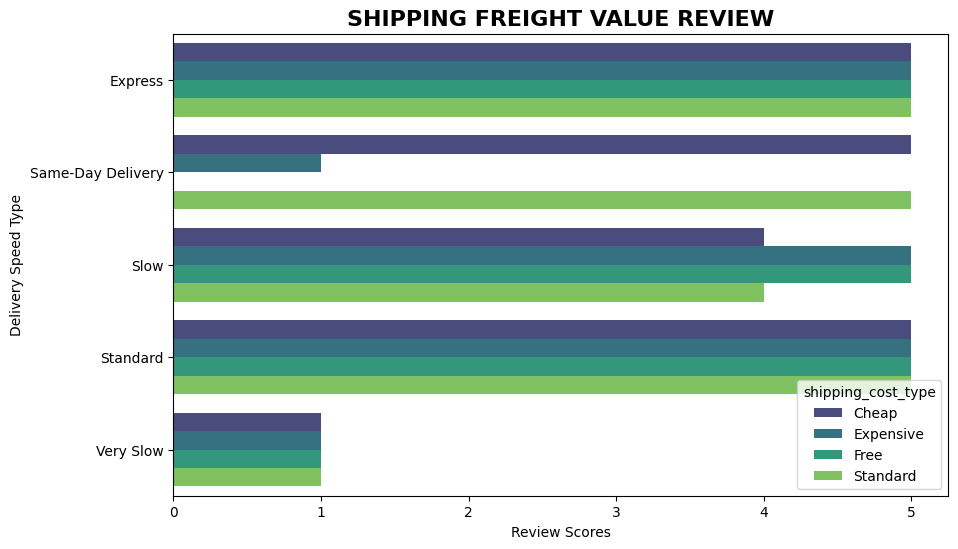

In [19]:
# COST OF SHIPPING FREIGHT VALUE
fv_rs_type = main_df.groupby(['customer_unique_id', 'delivery_speed', 'shipping_cost_type'])[['freight_value', 'review_score']].agg({'freight_value': 'median', 'review_score': 'median'}).reset_index()
fv_rs_plot = fv_rs_type.groupby(['delivery_speed', 'shipping_cost_type'])['review_score'].median().reset_index()

plt.tight_layout()
plt.figure(figsize=(10,6))
sns.barplot(y='delivery_speed', x='review_score', hue='shipping_cost_type', data=fv_rs_plot, palette='viridis')
plt.title('SHIPPING FREIGHT VALUE REVIEW', fontsize=16, fontweight='bold')
plt.ylabel('Delivery Speed Type')
plt.xlabel('Review Scores')
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_88616\2792311903.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_speed', y='freight_value', data=fv_plot, palette='viridis')


<Figure size 640x480 with 0 Axes>

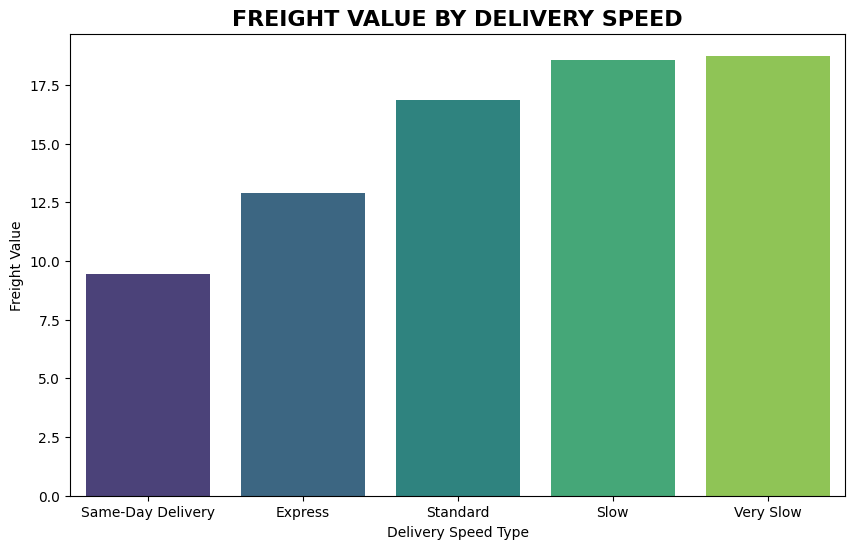

In [20]:
# FREIGHT VALUE + REVIEW SCORES 
fv_delivery = main_df.groupby(['customer_unique_id', 'delivery_speed'])[['freight_value', 'review_score']].agg({'freight_value': 'median', 'review_score': 'median'}).reset_index() 
fv_plot = fv_delivery.groupby('delivery_speed')['freight_value'].median().sort_values(ascending=True).reset_index() 

plt.tight_layout()
plt.figure(figsize=(10,6))
sns.barplot(x='delivery_speed', y='freight_value', data=fv_plot, palette='viridis')
plt.title('FREIGHT VALUE BY DELIVERY SPEED', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Speed Type')
plt.ylabel('Freight Value')
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_88616\2194311414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='delivery_speed', data=rs_delivery, order=order, palette='viridis')


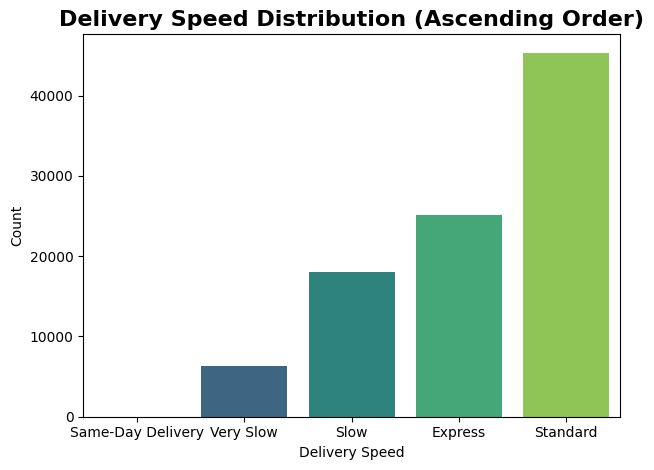

In [21]:
# DELIVERY SPEED DISTRIBUTION 
order = rs_delivery['delivery_speed'].value_counts().sort_values(ascending=True).index
sns.countplot(x='delivery_speed', data=rs_delivery, order=order, palette='viridis')
plt.title('Delivery Speed Distribution (Ascending Order)', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Speed')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_88616\1465881216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot.index, y=plot.values, palette='viridis')


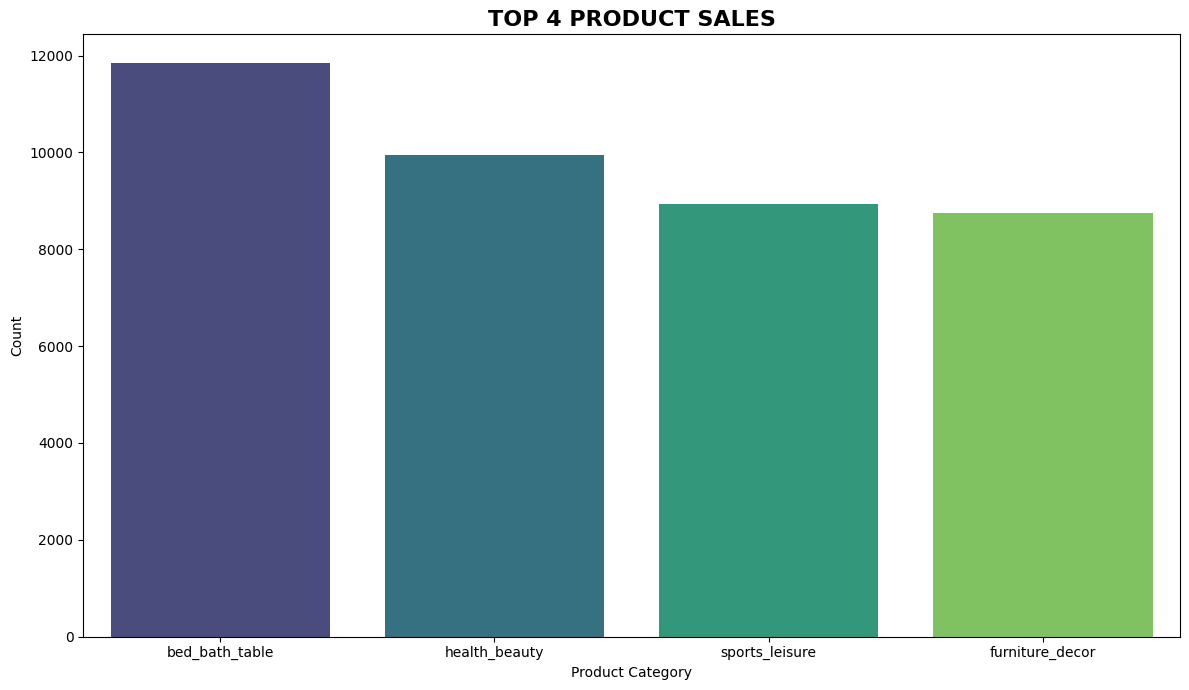

In [22]:
# TOP PRODUCT_CATEGORY SALES 
plot = main_df['product_category_name_english'].value_counts().head(4)

plt.figure(figsize=(12, 7))
sns.barplot(x=plot.index, y=plot.values, palette='viridis')
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.title('TOP 4 PRODUCT SALES', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_88616\720477097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_diversity', data=product_diversity, palette=['#4c72b0', '#55a868'])


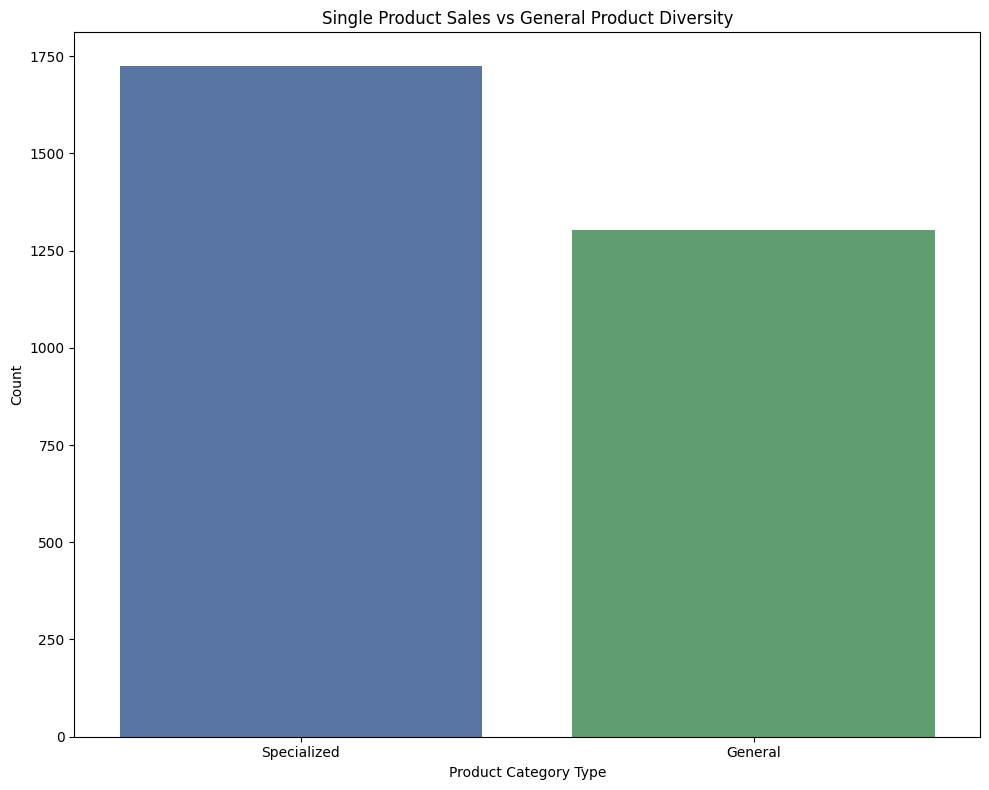

In [23]:
# SINGLE PRODUCT SALES VS GENERAL PRODUCT DIVERSITY 
product_diversity = main_df.groupby('seller_id')['product_category_name_english'].nunique().reset_index(name='seller_count')
product_diversity['product_diversity'] = product_diversity['seller_count'].map(lambda x: 'Specialized' if x == 1 else 'General')

plt.figure(figsize=(10,8))
sns.countplot(x='product_diversity', data=product_diversity, palette=['#4c72b0', '#55a868'])
plt.xlabel('Product Category Type')
plt.ylabel('Count')
plt.title('Single Product Sales vs General Product Diversity')
plt.tight_layout()
plt.show()

In [24]:
main_df = main_df.merge(product_diversity, on='seller_id', how='left')

In [25]:
# SELLLER DIVERSITY VS BASKET VALUE 
order_basket_value = (
    order_items.groupby('order_id')
    .agg({'price': 'sum', 'freight_value': 'sum'})
    .assign(total_value=lambda x: x['price'] + x['freight_value'])
    .reset_index()
)

plot2  = (
    order_items.merge(product_diversity, on='seller_id')
    .merge(order_basket_value, on='order_id')
)


Correlation between seller diversity and basket value: -0.07


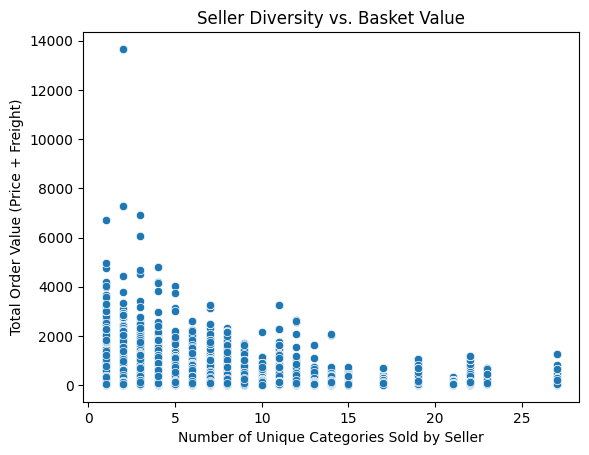

In [26]:
correlation = plot2['seller_count'].corr(plot2['total_value'])
print(f"Correlation between seller diversity and basket value: {correlation:.2f}")

sns.scatterplot(data=plot2, x='seller_count', y='total_value')
plt.title("Seller Diversity vs. Basket Value")
plt.xlabel("Number of Unique Categories Sold by Seller")
plt.ylabel("Total Order Value (Price + Freight)")
plt.show()

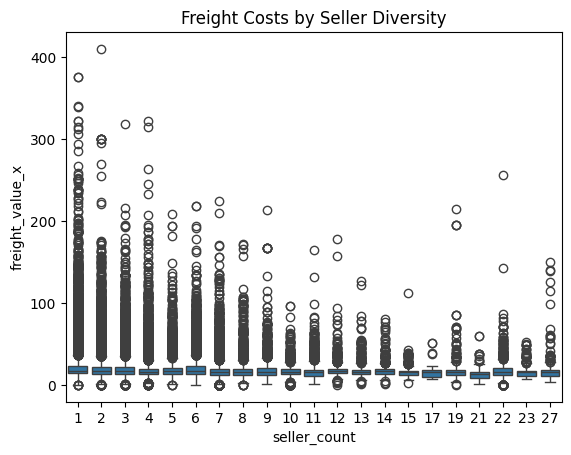

In [27]:
# FREIGHT COSTS VS SELLER DIVERSITY 

sns.boxplot(data=plot2, x='seller_count', y='freight_value_x')
plt.title("Freight Costs by Seller Diversity")
plt.show()

In [94]:
# ------------------------- TARGET AUDIENCE FILTERS  ------------------------- #

# Define dense cities: top 10 cities by number of unique customers
customer_counts = main_df.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False)
dense_cities = customer_counts.head(10).index.tolist()

# Define reference date and last 6 months
reference_date = main_df['order_purchase_timestamp'].max()
six_months_ago = reference_date - pd.Timedelta(days=180)

# Identify target customers: in dense cities and have purchased in last 6 months
target_customers = main_df[
    (main_df['customer_city'].isin(dense_cities)) &
    (main_df['order_purchase_timestamp'] >= six_months_ago)
]['customer_unique_id'].unique()

# Calculate seller stats
seller_stats = main_df.groupby('seller_id').agg({
    'freight_value': 'mean',
    'review_score': 'mean',
    'order_id': 'nunique',
    'delivery_days': lambda x: (x <= 2).mean()
}).rename(columns={
    'freight_value': 'avg_freight_value',
    'review_score': 'avg_review_score',
    'order_id': 'order_count',
    'delivery_days': 'express_penetration'
})

# Define thresholds for sellers
median_freight = seller_stats['avg_freight_value'].median()
order_count_threshold = seller_stats['order_count'].quantile(0.5)

# Select target sellers
target_sellers = seller_stats[
    (seller_stats['avg_freight_value'] < median_freight) &
    (seller_stats['avg_review_score'] >= 4.0) &
    (seller_stats['order_count'] > order_count_threshold) &
    (seller_stats['express_penetration'] < 0.2)
].index

# Identify light categories: average weight < 5000g
category_weight = main_df.groupby('product_category_name_english')['product_weight_g'].mean()
light_categories = category_weight[category_weight < 5000].index

# Calculate category stats for light categories
category_stats = main_df[main_df['product_category_name_english'].isin(light_categories)].groupby('product_category_name_english').agg({
    'order_id': 'nunique',
    'delivery_days': lambda x: (x <= 2).mean()
}).rename(columns={
    'order_id': 'order_count',
    'delivery_days': 'express_penetration'
})

# Select target categories: high order count and low express penetration
median_order_count = category_stats['order_count'].median()
target_categories = category_stats[
    (category_stats['order_count'] > median_order_count) &
    (category_stats['express_penetration'] < 0.2)
].index

# Output the results
print("Target Customers:", len(target_customers))
print("Target Sellers:", len(target_sellers))
print("Target Categories:", len(target_categories))

target_df = main_df[
   main_df['customer_unique_id'].isin(target_customers) &
    main_df['seller_id'].isin(target_sellers) &
    main_df['product_category_name_english'].isin(target_categories)
]


Target Customers: 13727
Target Sellers: 405
Target Categories: 30


In [87]:
target_df 

,customer_unique_id,avg_review_score,avg_order_value,total_revenue,order_count
0,00539155ce68fbe677934aebdb17e09b,4.0,58.25,58.25,1
1,0058e7db269cc11558913b42beb115d0,4.0,78.88,78.88,1
2,005d8faa4cf789cf52fb880a8569880a,5.0,89.25,89.25,1
3,0065f7795a38381973a373c8b4939679,4.0,31.22,31.22,1
4,008b82b072c6b564fcce49a325f84097,4.0,45.13,45.13,1
...,...,...,...,...,...
4129,ffbcd1715dfbead64e1b896044d73c76,5.0,35.77,35.77,1
4130,ffcd4b43c08405501a6bf2c66be83e83,5.0,30.29,30.29,1
4131,ffd2aac179372f267e7b9186ac7a1bcc,4.0,29.13,29.13,1
4132,ffd6f65402f2bc47238ecd2bdc93e0d4,5.0,83.46,166.92,1


In [82]:
# ------------------------- RANDOM SPLIT ------------------------- #

# Aggregation 
target_df = target_df.groupby('customer_unique_id').agg(
    avg_review_score=('review_score', 'mean'),
    avg_order_value=('payment_value', 'mean'),
    total_revenue=('payment_value',  'sum'),
    order_count=('order_id', 'nunique'),
).reset_index()

customer_level_data['repeat_purchase'] = (customer_level_data['order_count'] > 1).astype(int)

# Random Split 
np.random.seed(42)
customer_level_data['group'] = np.random.choice(['control', 'treatment'], 
                                                size=len(customer_level_data), 
                                                p=[0.5, 0.5])

control_group = customer_level_data[customer_level_data['group']=='control']
test_group = customer_level_data[customer_level_data['group']=='treatment']

# Sanity Check 
print("Customer count per group:")
print(customer_level_data['group'].value_counts())
print('\\n' + '-'*30 + '\\n') 

Customer count per group:
group
treatment    2073
control      2061
Name: count, dtype: int64
\n------------------------------\n


In [79]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency 
from statsmodels.stats.proportion import proportion_effectsize

In [83]:
# ------------------------- BIAS TEST ------------------------- #

bias_results = {
        'Metric': ['Average Order Value', 'Total Revenue', 'Average Review Score', 'Repeat Purchase Rate'],
        'P-Value': [
            ttest_ind(control_group['avg_order_value'], test_group['avg_order_value'], equal_var=False, nan_policy='omit').pvalue,
            ttest_ind(control_group['total_revenue'], test_group['total_revenue'], equal_var=False, nan_policy='omit').pvalue,
            mannwhitneyu(control_group['avg_review_score'], test_group['avg_review_score'], nan_policy='omit').pvalue,
            mannwhitneyu(control_group['repeat_purchase'], test_group['repeat_purchase'], nan_policy='omit').pvalue
        ]
    }

# Step 7: Output results
bias_df = pd.DataFrame(bias_results)
print("Balance Check Results:")
print(bias_df)


Balance Check Results:
                 Metric   P-Value
0   Average Order Value  0.709549
1         Total Revenue  0.613121
2  Average Review Score  0.959232
3  Repeat Purchase Rate  0.037234


In [76]:
customer_level_data 

,customer_unique_id,avg_review_score,total_spend
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,18.90
2,0000f46a3911fa3c0805444483337064,3.0,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,25.99
4,0004aac84e0df4da2b147fca70cf8255,5.0,180.00
...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,1570.00
93392,fffea47cd6d3cc0a88bd621562a9d061,4.0,64.89
93393,ffff371b4d645b6ecea244b27531430a,5.0,89.90
93394,ffff5962728ec6157033ef9805bacc48,5.0,115.00


In [86]:
from statsmodels.stats.power import TTestIndPower

# Step 1: Calculate current sample size (assuming 50/50 split)
current_sample_size = len(target_df) // 2

# Step 2: Power Analysis for Customer Review Score (15% increase)
baseline_review = target_df['avg_review_score'].mean()
std_review = target_df['avg_review_score'].std()
print(f"\nBaseline review score: {baseline_review:.4f}")
print(f"Standard deviation of review score: {std_review:.4f}")

mean1_review = baseline_review
mean2_review = mean1_review * 1.15
effect_size_review = (mean2_review - mean1_review) / std_review
alpha = 0.05
power = 0.8
ratio = 1

power_analysis_ttest = TTestIndPower()
sample_size_review = power_analysis_ttest.solve_power(
    effect_size=effect_size_review,
    alpha=alpha,
    power=power,
    ratio=ratio,
    alternative='two-sided'
)

print(f"\nPower Analysis for Customer Review Score (15% increase):")
print(f"Required sample size per group: {int(sample_size_review)} customers")
print(f"Current sample size per group: {current_sample_size} customers")
print(f"Sufficient sample size: {current_sample_size >= int(sample_size_review)}")

# Step 3: Power Analysis for Total Revenue (10% increase)
baseline_revenue = target_df['total_revenue'].mean()
std_revenue = target_df['total_revenue'].std()
print(f"\nBaseline total revenue: {baseline_revenue:.2f}")
print(f"Standard deviation of total revenue: {std_revenue:.2f}")

mean1_revenue = baseline_revenue
mean2_revenue = mean1_revenue * 1.10
effect_size_revenue = (mean2_revenue - mean1_revenue) / std_revenue
alpha = 0.05
power = 0.8
ratio = 1

power_analysis_ttest = TTestIndPower()
sample_size_revenue = power_analysis_ttest.solve_power(
    effect_size=effect_size_revenue,
    alpha=alpha,
    power=power,
    ratio=ratio,
    alternative='two-sided'
)

print(f"\nPower Analysis for Total Revenue (10% increase):")
print(f"Required sample size per group: {int(sample_size_revenue)} customers")
print(f"Current sample size per group: {current_sample_size} customers")
print(f"Sufficient sample size: {current_sample_size >= int(sample_size_revenue)}")


Baseline review score: 4.3171
Standard deviation of review score: 1.1828

Power Analysis for Customer Review Score (15% increase):
Required sample size per group: 53 customers
Current sample size per group: 2067 customers
Sufficient sample size: True

Baseline total revenue: 140.35
Standard deviation of total revenue: 209.74

Power Analysis for Total Revenue (10% increase):
Required sample size per group: 3506 customers
Current sample size per group: 2067 customers
Sufficient sample size: False
